In [14]:
import random_walker as rw
import utils
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

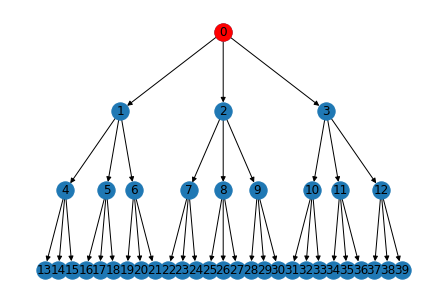

In [15]:
offspring_factor=3
height=3
H=nx.generators.classic.balanced_tree(offspring_factor,height)
root=utils.list_degree_nodes(H,offspring_factor,1)[0]
H,_=utils.directify(H,root)
pos=graphviz_layout(H,prog='dot')
nx.draw(H,pos)
nx.draw_networkx_labels(H,pos)
nx.draw_networkx_nodes(H,pos,nodelist=[root],node_color='r',labels=True)
plt.show()

In [3]:
#G=utils.random_dag(10,20)
#root=np.random.choice(utils.sources(G))pos=graphviz_layout(G,prog='dot')
#nx.draw(G,pos)
#nx.draw_networkx_nodes(G,pos,nodelist=[root],node_color='r')
#plt.show()

In [4]:
def metric(*args):
    return rw.hamming_dist(*args)**2

In [5]:
def show_pattern_deco(func):
    def wrapper(*args,**kwargs):
        out = func(*args,**kwargs)
        print(args,'-->\n',out)
        return out
    return wrapper
#rw.mutate_pattern=show_pattern_deco(rw.mutate_pattern)

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


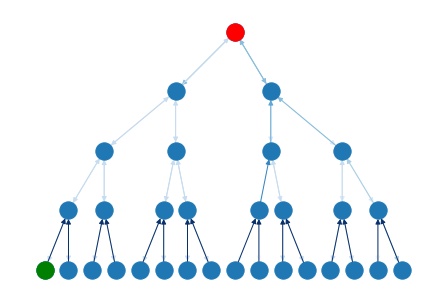

In [6]:
G=rw.patternWalker(H,root,15,0.01,metric=metric)
G.set_weights()
pos=graphviz_layout(G,prog='dot')
(edges,weights) = zip(*nx.get_edge_attributes(G,'prob').items())
nx.draw(G, pos, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Blues)
nx.draw_networkx_nodes(G,pos,nodelist=[root],node_color='r')
nx.draw_networkx_nodes(G,pos,nodelist=[G.target_node],node_color='g')
plt.show()

In [7]:
print('Number of duplicate strings/Number of strings:', G.num_pattern_duplicates(),'/',len(G))
mfpts=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)],'prob')
print(G.target_node)
mfpts


Number of duplicate strings/Number of strings: 24 / 31
15


{(0, 15): (47.99999999999986+0j),
 (0, 16): (47.99999999999987+0j),
 (0, 17): (47.99999999999983+0j),
 (0, 18): (47.99999999999983+0j),
 (0, 19): (47.9999999999997+0j),
 (0, 20): (47.99999999999971+0j),
 (0, 21): (47.99999999999973+0j),
 (0, 22): (47.999999999999716+0j),
 (0, 23): (14.840000000000199+0j),
 (0, 24): (14.840000000000217+0j),
 (0, 25): (18.040000000000177+0j),
 (0, 26): (18.040000000000173+0j),
 (0, 27): (19.880000000000376+0j),
 (0, 28): (19.880000000000383+0j),
 (0, 29): (18.68000000000048+0j),
 (0, 30): (18.68000000000044+0j)}

In [8]:
mfpts={}
for branch in G.hierarchy_backup.successors(G.root):
    mfpts[branch]=utils.mfpt(G,[(root,b) for b in nx.descendants(G.hierarchy_backup,branch)],'prob')
    #print(branch)
    #print(mfpts[branch].keys())
print(utils.mfpt(G,[(root,G.target_node)],'prob'))

(47.99999999999986+0j)


/home/k1801311/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:844: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


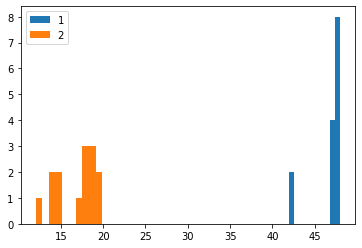

In [9]:
for branch in G.hierarchy_backup.successors(G.root):
    _=plt.hist(mfpts[branch].values(),label=str(branch))
plt.legend(loc='best')
plt.show()

In [10]:
mfpts=[]
down_c=[]
up_c=[]
for _ in range(200):
    G.reset_patterns()
    G.set_weights()
    t_temp=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)],'prob')
    d_temp=utils.downward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),'prob',G.nodes())
    u_temp=utils.upward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),'prob',G.nodes())
    for x in t_temp.values():
        mfpts.append(x)
    for x in d_temp:
        down_c.append(x)
    for x in u_temp:
        up_c.append(x)

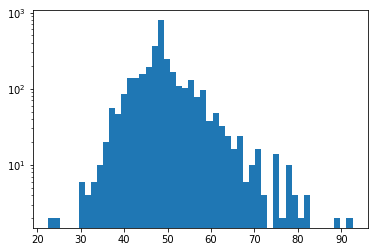

In [11]:
_=plt.hist(mfpts,bins=50)
plt.yscale('log')
#plt.xscale('log')
plt.show()

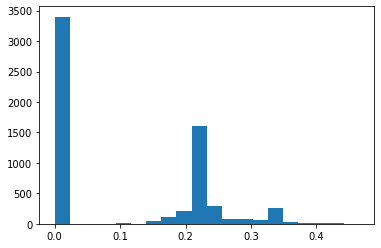

In [12]:
#down=utils.downward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),'prob',G.nodes())
#print(down)
_=plt.hist(down_c,bins=20)
plt.show()

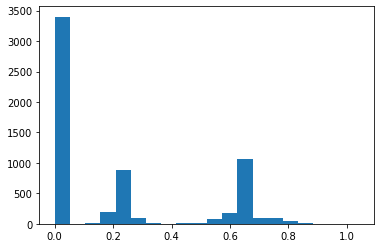

In [13]:
#up=utils.upward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),'prob',G.nodes())
#print(up)
_=plt.hist(up_c,bins=20)
plt.show()